In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(1, input_size) * 0.1  # Initialize weights
        self.bias = np.random.randn() * 0.1  # Initialize bias
        self.learning_rate = learning_rate

    

    def forward(self, x):
        """Forward pass."""
        return np.dot(self.weights, x.T) + self.bias

    def predict(self, x):
        """Predict output for input x."""
        return np.dot(x, self.weights.T) + self.bias
    
    
    def backward(self,x,y): # x(m,2) , y(10,1)
            # Forward pass
        predictions = self.forward(x) #(1,m)
        
        # Compute loss
        loss = np.sum((y.T - predictions) ** 2) # (1,m)--> scaler
        
        # Backpropagation
        error = y.T - predictions # (1,m)
        d_weights = -2 * np.dot(error, x) # (1,m)@(m,2) --> (1,2)
        d_bias = -2 * np.sum(error)# scaler
        
        return d_weights,d_bias

In [3]:
class MLP(Perceptron):
    def __init__(self,input_data ,learning=0.1, epochs=10):
        input_size = input_data.shape[1]
        super(MLP,self).__init__(input_size)
        self.perceptron_1 = Perceptron(input_size=input_size)
        self.perceptron_2 = Perceptron(input_size=input_size)
        self.perceptron_out = Perceptron(2)
        self.history = []
        self.lr = learning
        self.epochs = epochs

    def forward1(self,x):
        u = self.perceptron_1.forward(x)
        v = self.perceptron_2.forward(x)
        z = np.concat((u.T,v.T),axis=1)
        return  self.perceptron_out.forward(z)
    
    def predict1(self,x): # x -> (m,2)
        u = self.perceptron_1.predict(x) # (m,1)
        v = self.perceptron_2.predict(x) # (m,1)
        z = np.concat((u,v),axis=1)
        
        return  u,v,self.perceptron_out.predict(z) # m(m,1)
    
    def train(self,x,y, ):
        for epoch in range(self.epochs):

            u,v,pred = self.predict1(x) # (m,1)

            z = np.concat((u,v),axis=1)

            loss = 1/y.shape[0]*np.sum(((y - pred )**2))

            w3,b3  = self.backward(z,pred)
            self.perceptron_out.weights -=  self.lr*w3
            self.perceptron_out.bias -=  self.lr*b3

            w2,b2  = self.backward(x,v)
            self.perceptron_2.weights -=  self.lr*w2
            self.perceptron_2.bias -=  self.lr*b2

            w1,b1 = self.backward(x,u)
            self.perceptron_1.weights -=  self.lr*w1
            self.perceptron_1.bias -=  self.lr*b1

            self.history.append(loss)

            if epoch%1 ==0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def plot_loss(self):
        plt.figure(figsize=(10,8))
        plt.plot(self.history)
        plt.grid(True)
        plt.show()
                
X = np.random.randn(100, 2)
y = np.array([(2*x[0] + 3*x[1]).astype(float) for x in X]).reshape(-1, 1)
   
mlp = MLP(X,learning=0.0003,epochs=10)


In [4]:
mlp.train(X,y)

Epoch 0, Loss: 13.565058030332203
Epoch 1, Loss: 13.57146120452719
Epoch 2, Loss: 13.578591950887319
Epoch 3, Loss: 13.586536310361211
Epoch 4, Loss: 13.595391845849946
Epoch 5, Loss: 13.605269508603438
Epoch 6, Loss: 13.616295877200512
Epoch 7, Loss: 13.628615857419291
Epoch 8, Loss: 13.642395954984934
Epoch 9, Loss: 13.657828263889575


In [5]:
[mlp.perceptron_1.weights , mlp.perceptron_2.weights,mlp.perceptron_out.weights]

[array([[ 0.03236665, -0.06594299]]),
 array([[0.0947598 , 0.12889829]]),
 array([[0.13372864, 0.05906066]])]

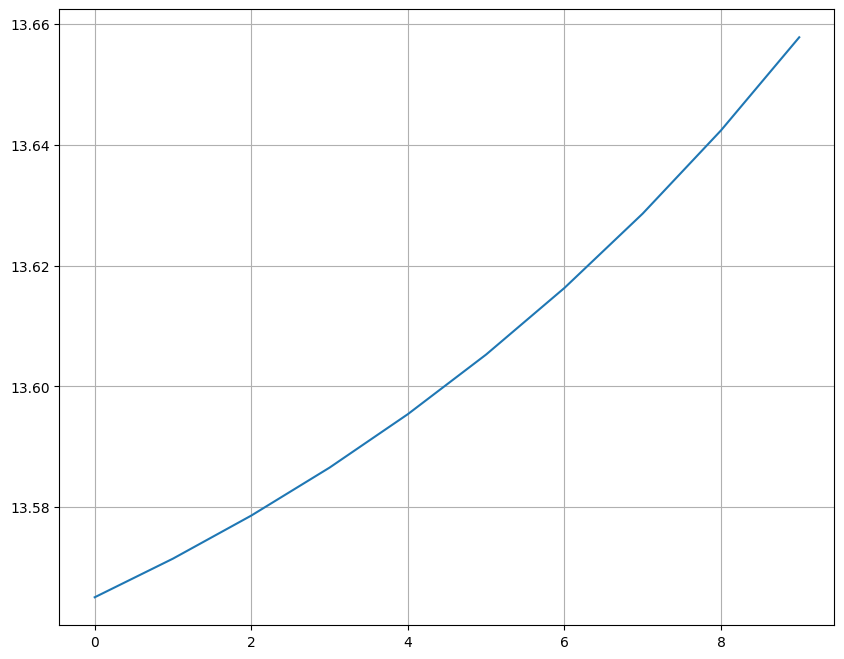

In [6]:
mlp.plot_loss()